# Binary Classification

#### I am taking titanic dataset and after applying all ML algorithms to find out if they survived or not ?

In [119]:
# Importing library

import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix


In [120]:
# Load and Read the Dataset
import pandas as pd
df = pd.read_csv('titanic.csv')



In [121]:
df.head()               # Explore Data # Printing top 5 Value


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [122]:
df.describe()           # Summary statistics


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [124]:
df.isnull().sum()                  # finding missing Values

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [125]:
df['age'].fillna(df['age'].median(), inplace=True)   # Handling Missing Values
# Encode Categorical Features,  Convert 'Sex' column to binary (0 or 1)

df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [126]:

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [127]:
X = df[['age', 'sex', 'pclass']]  # Features
y = df['survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### (1) Logistic Regression

0.7748091603053435

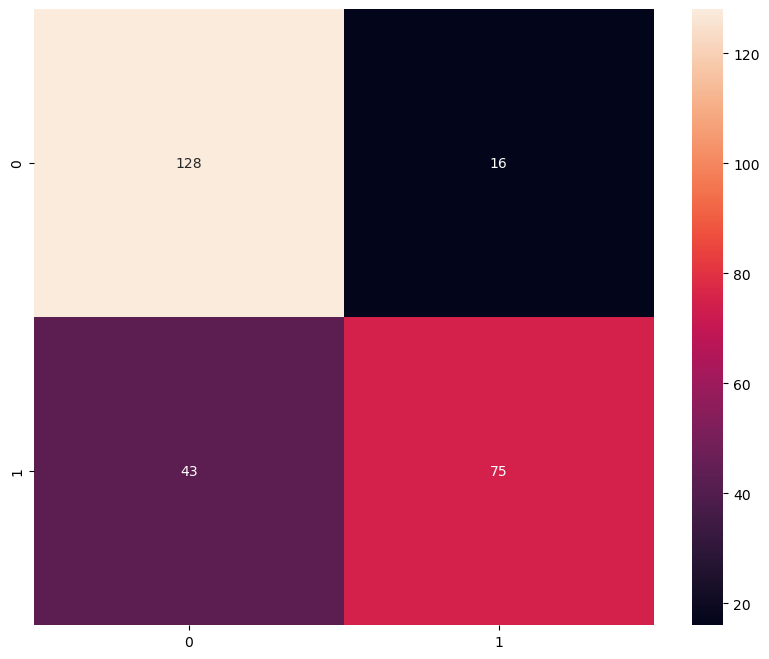

In [128]:
from sklearn.linear_model import LogisticRegression
# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logreg.predict(X_test)

# Evaluate performance (you can use metrics like accuracy, precision, recall, etc.)
logreg_accuracy = logreg.score(X_test, y_test)
#plot confusion matrix

conf_mat_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_logistic, annot=True, fmt='d')
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred_logistic)
logistic_acc

### (2) Naive Bayes

Naive Bayes Accuracy: 0.7405


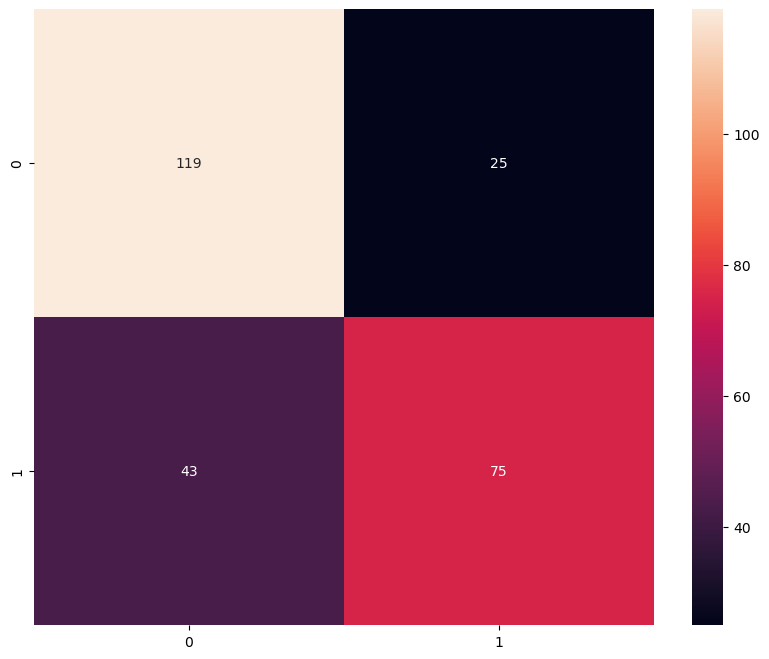

In [129]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Initialize and train the Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Perform hyperparameter tuning using GridSearchCV
params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search = GridSearchCV(naive_bayes_model, params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_nb_model = grid_search.best_estimator_

# Make predictions
y_pred_nb = best_nb_model.predict(X_test)


#Plot Confusion Matrix

conf_mat_SVM=confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_SVM,annot=True,fmt='d')
# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

### (3) Support Vector Machine(SVM)

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Accuracy: 0.7481


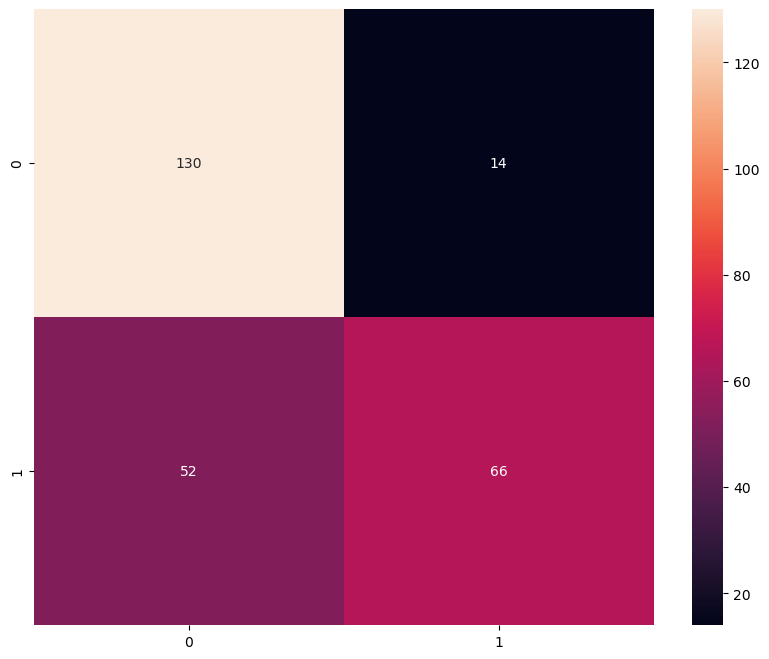

In [130]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],    # Kernel coefficient for 'rbf' kernel
    'kernel': ['rbf']                  # Kernel type
}



# Initialize SVM model
svm_model = SVC(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize SVM model with best parameters
best_svm_model = SVC(**best_params, random_state=42)

# Train the SVM model with best parameters
best_svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = best_svm_model.predict(X_test)

#Plot Confusion Matrix

conf_mat_SVM=confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_SVM,annot=True,fmt='d')
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")


### (4) K-nearest neighbour Classifier

C:\Users\VKUMA159\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\VKUMA159\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\VKUMA159\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\VKUMA159\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

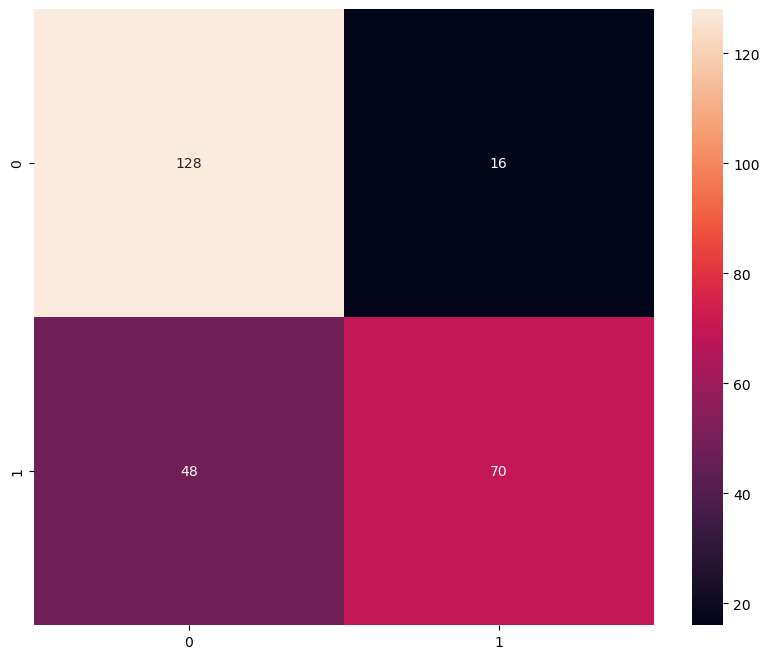

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a pipeline for preprocessing and KNN classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Define hyperparameters grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7],  # Different number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Different weighting schemes
    'knn__metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Initialize and train the KNN classifier with hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_knn_model = grid_search.best_estimator_

# Make predictions
y_pred_knn = best_knn_model.predict(X_test)

#Plot Confusion Matrix

conf_mat_KNN=confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_KNN,annot=True,fmt='d')

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)


In [132]:
print(f"KNN Accuracy: {accuracy_knn:.4f}")

KNN Accuracy: 0.7557


### (5) Decision Tree

Decision Tree Accuracy: 0.7290
Best Parameters: {'max_depth': 15}


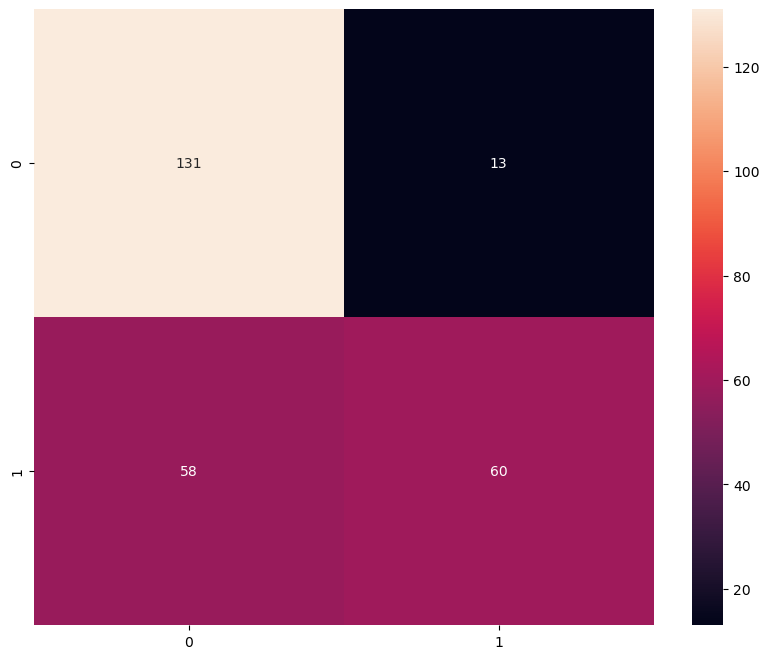

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 10, 15, 20, None]
}

# Initialize the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_decision_tree_model = grid_search.best_estimator_

# Make predictions
y_pred_dt = best_decision_tree_model.predict(X_test)


#Plot Confusion Matrix
conf_mat_DT=confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_DT,annot=True,fmt='d')
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

### (6) Random Forest Classifier

Random Forest Accuracy: 0.7290


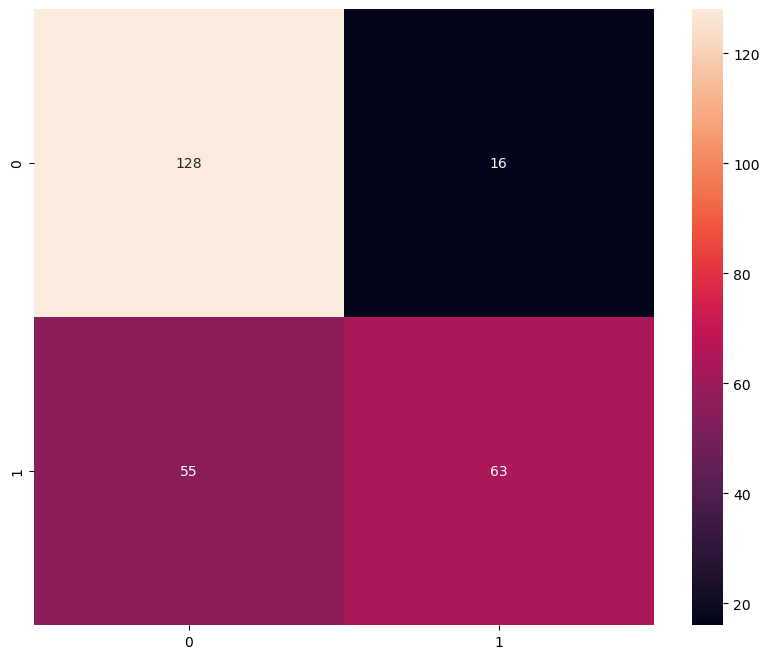

In [134]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)

#Plot Confusion Matrix
conf_mat_RF=confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_RF,annot=True,fmt='d')
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


#### Compairing accuracy algorithms using bar graph

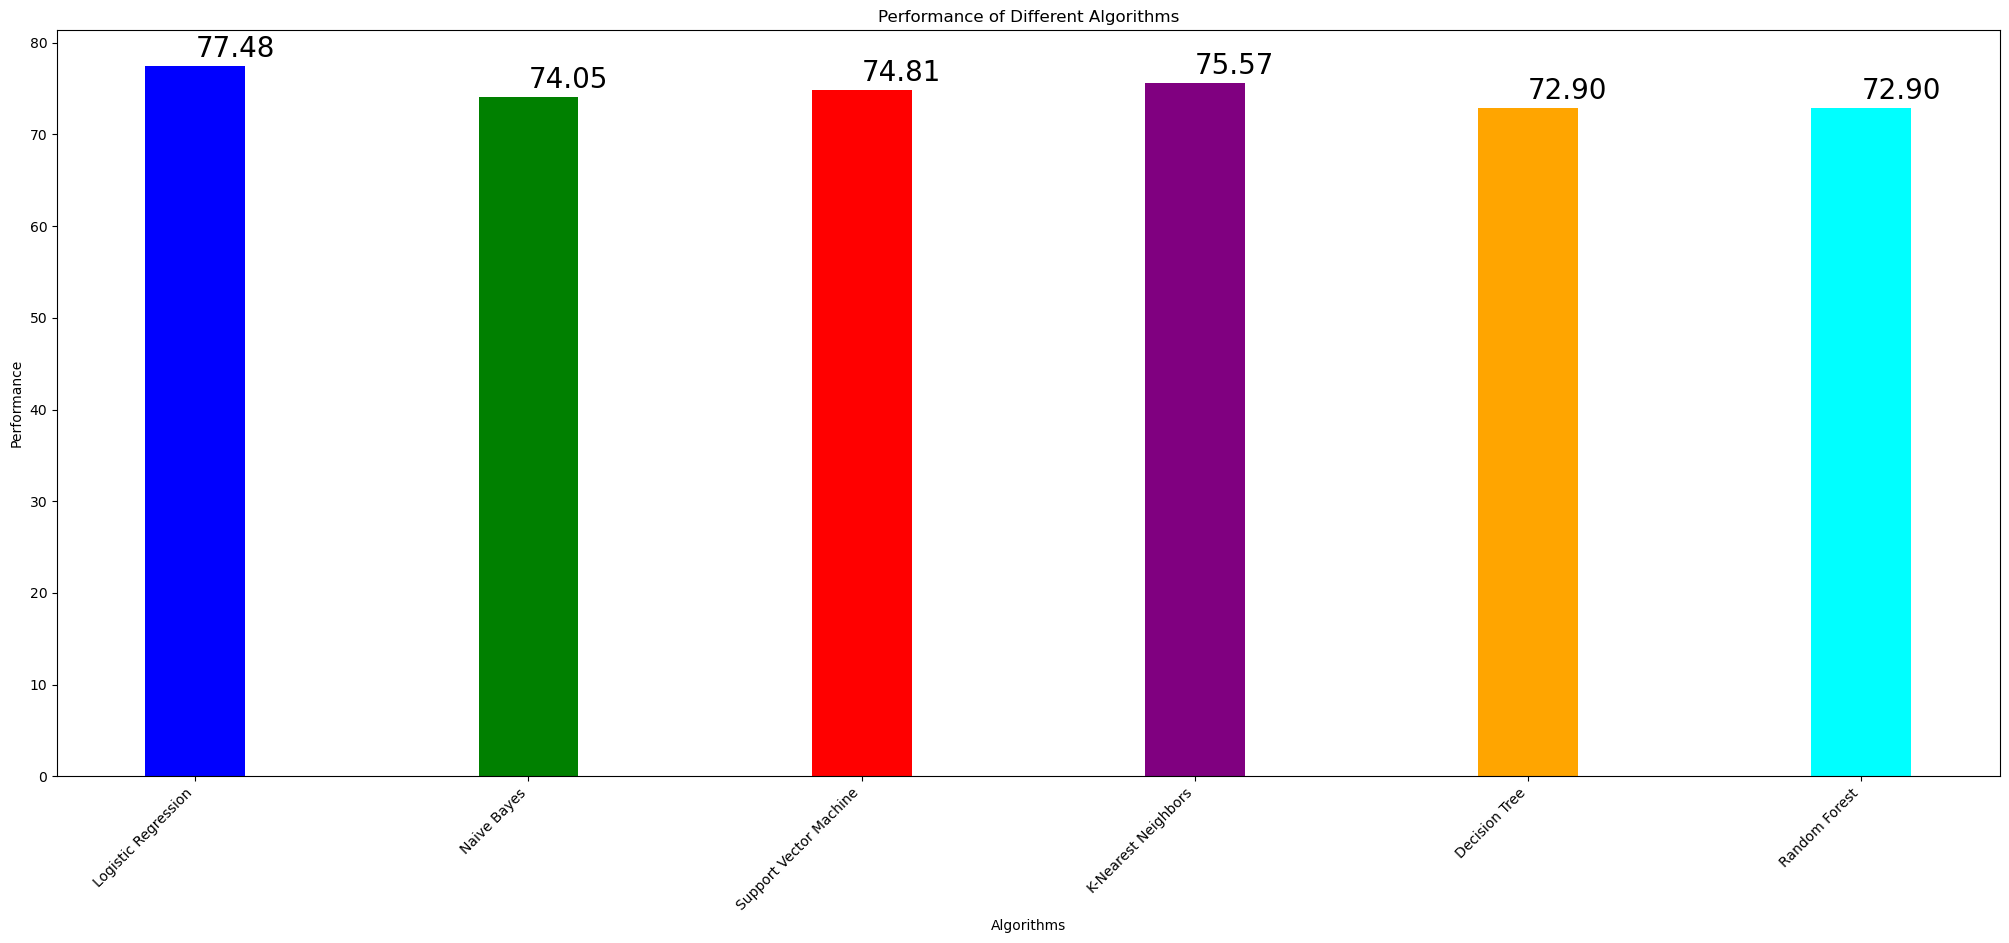

In [135]:
import numpy as np
import matplotlib.pyplot as plt



# Putting accuracies into an array
accuracies = np.array([logistic_acc, accuracy_nb, accuracy_svm, accuracy_knn, accuracy_dt, accuracy_rf]) * 100

# Algorithms list
algorithms = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest']

# Colors for bars
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(algorithms, accuracies, width=0.3, color=colors)

# Adding text labels
for index, data in enumerate(accuracies):
    plt.text(x=index, y=data + 1, s="{:.2f}".format(data), fontdict=dict(fontsize=20))

# Beautifying plot
plt.tight_layout()
ax.set_xlabel('Algorithms')
ax.set_ylabel('Performance')
ax.set_title('Performance of Different Algorithms')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Multiclass Classification

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

In [137]:
df = pd.read_csv("Iris.csv")


In [138]:
df.head()            # Checking first top 5 values


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [139]:
df.shape                            # Check the shape of the dataframe


(150, 6)

In [140]:
df.info()                                    # Display information about the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [141]:
df.describe()                             # Get statistical information about the dataframe


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [142]:
df.isnull().sum()   # Check for missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [143]:
# Split the data into features and labels
X = df.drop('Species', axis=1)
y = df['Species']


In [144]:
# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [145]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Xgboost

In [146]:
# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

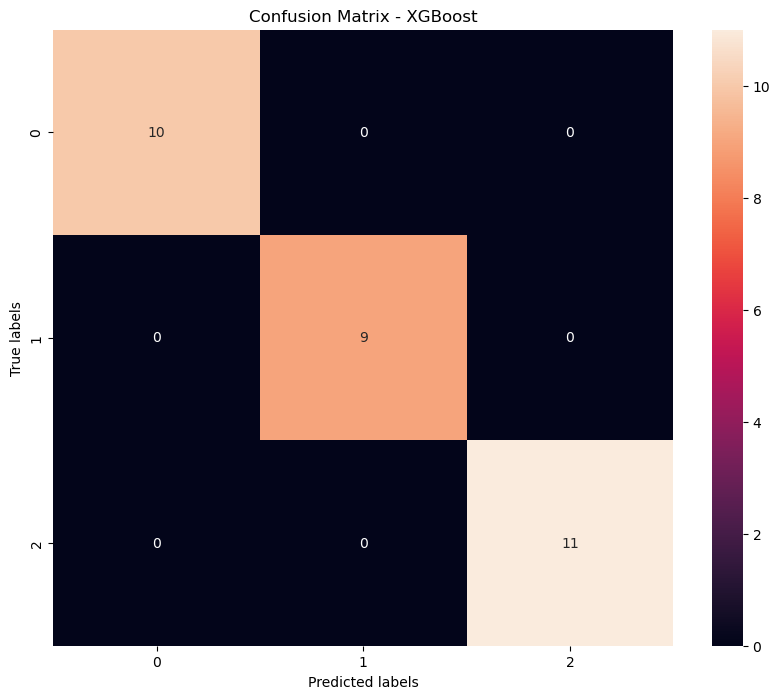

In [147]:
# Predictions
y_pred = xgb_model.predict(X_test)

#plot confusion matrix
conf_mat_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()



In [148]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


### OnevsRest

In [149]:

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Initialize OneVsRestClassifier with XGBoost classifier
ovr_model = OneVsRestClassifier(xgb_model)

# Train the model
ovr_model.fit(X_train, y_train)



OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                      

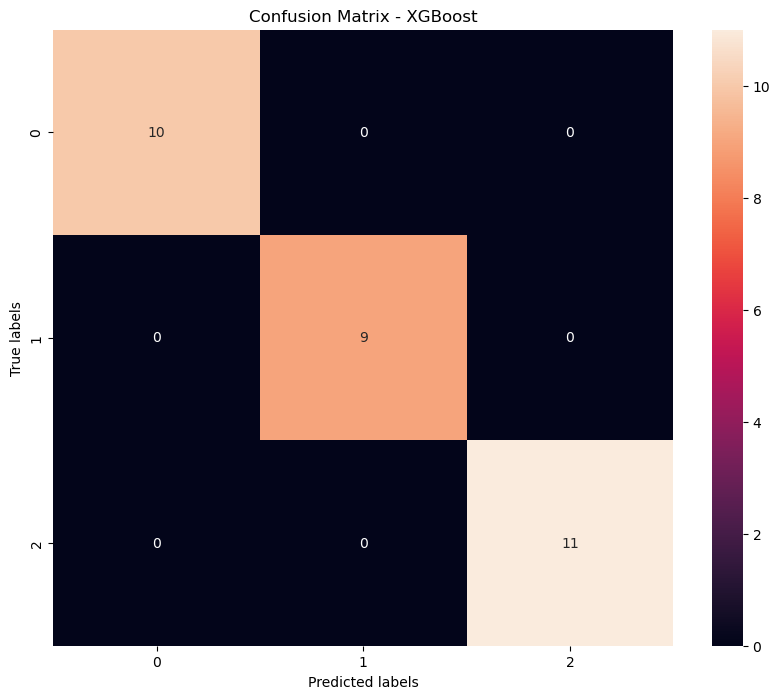

In [150]:
#plot confusion matrix
conf_mat_ovr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_ovr, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [151]:
# Predictions
y_pred = ovr_model.predict(X_test)

In [152]:

# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

Accuracy: 1.0


#### Compairing accuracy of xgboost and onevsRest

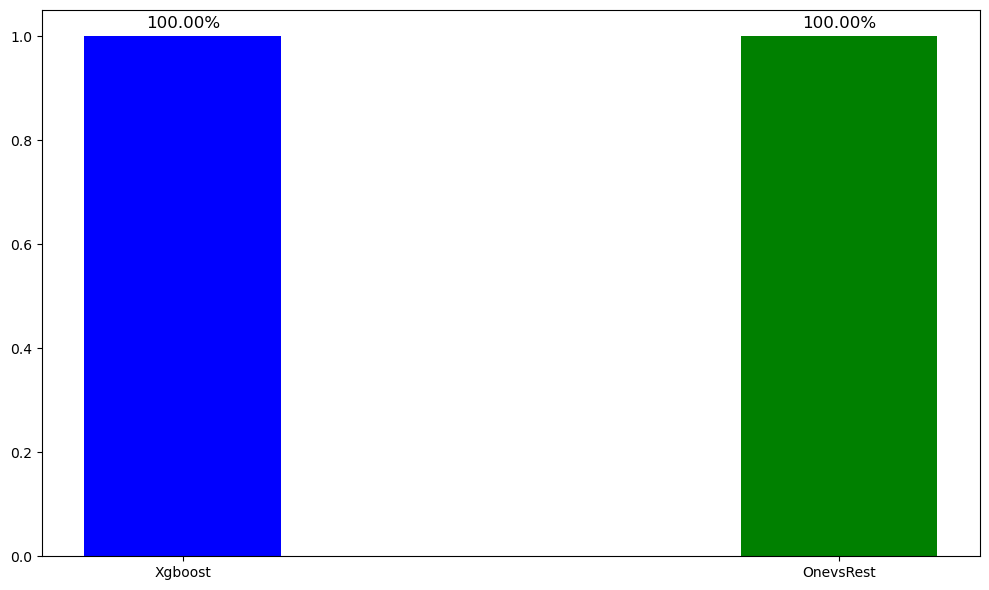

In [153]:
import matplotlib.pyplot as plt

accuracy = [1, 1]  # Example accuracy values
algorithm = ['Xgboost', 'OnevsRest']
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for bars
colors = ['blue', 'green']

# Plot the bars
bars = ax.bar(algorithm, accuracy, width=0.3, color=colors)

# Add text labels on top of each bar
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{acc*100:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

